In [ ]:
import pandas as pd

In [ ]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

# Отображение графика

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

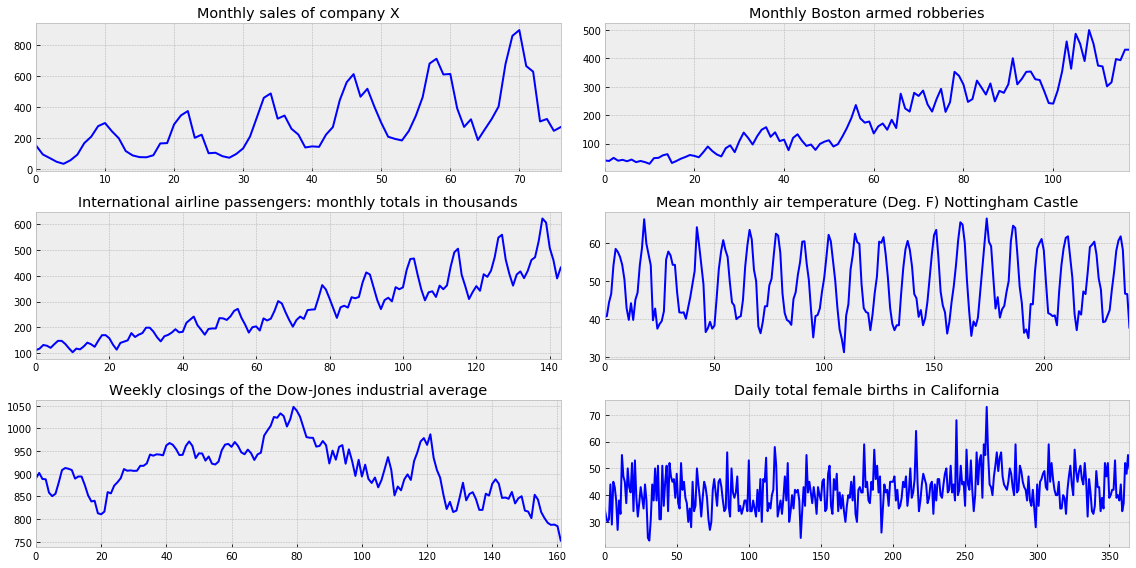

In [ ]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

# Ищем сезонность

In [ ]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

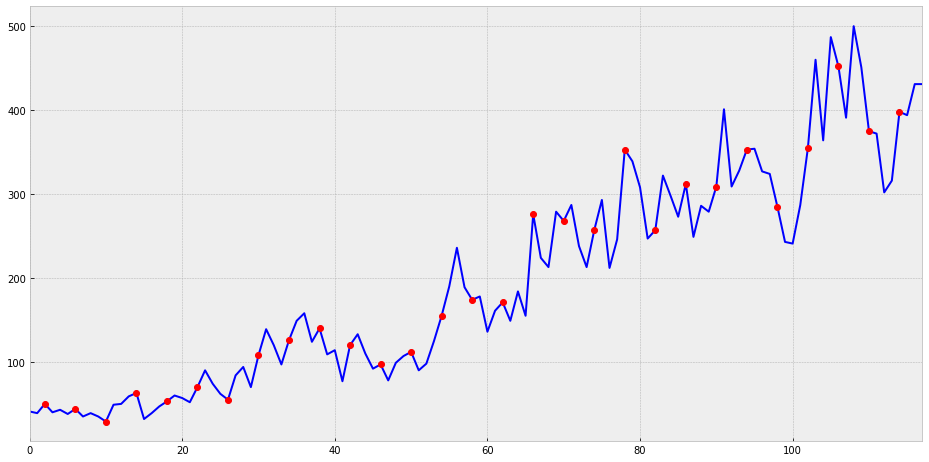

In [ ]:
plot_ts_and_points(robberies_in_boston['Count'], 2, 4)

# Нормализуем дисперсию

In [ ]:
from scipy.stats import boxcox

In [ ]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0)

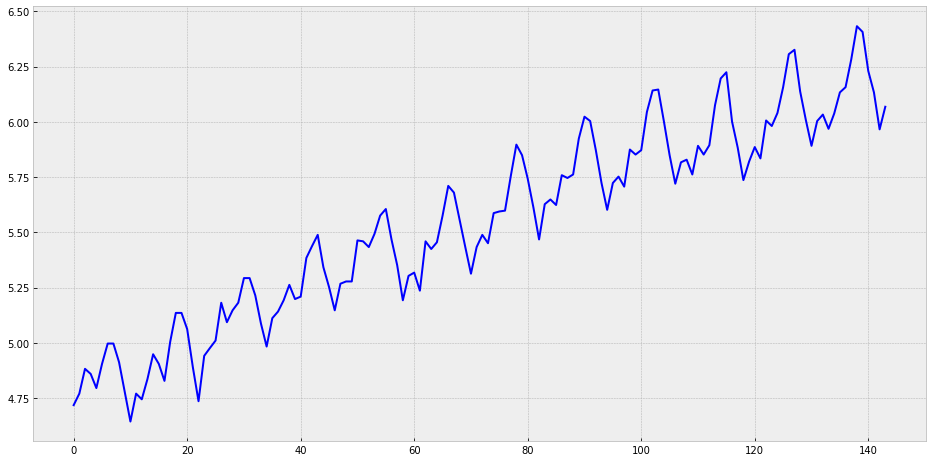

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Дифференцируем 

In [ ]:
import numpy as np

In [ ]:
series = np.diff(series, 1)

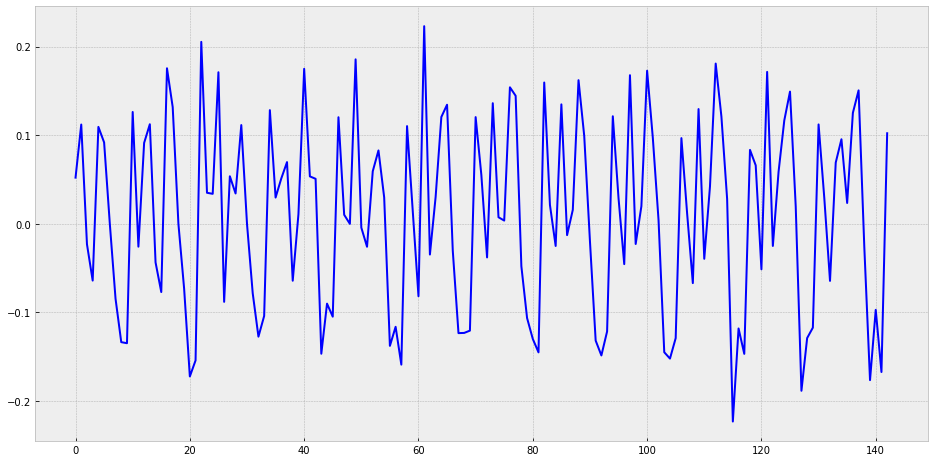

In [ ]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

# Тест Дики-Фуллера 

In [ ]:
from statsmodels.tsa.stattools import adfuller

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [ ]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [ ]:
test_stationarity(series)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [ ]:
test_stationarity(all_series["International airline passengers: monthly totals in thousands"])

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


# Коррелограммы

In [ ]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [ ]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


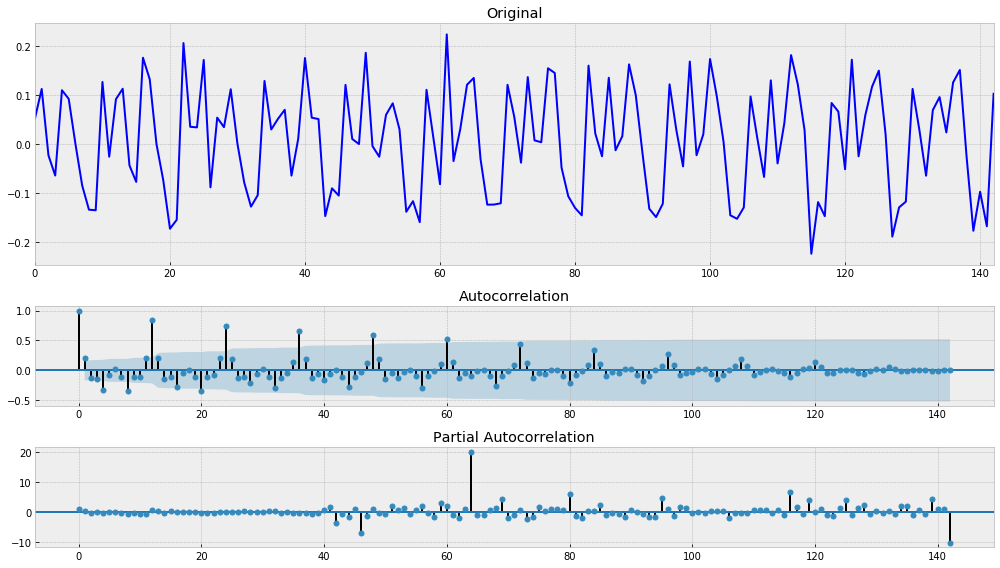

In [ ]:
tsplot(series)

/Users/arthursaprykin/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


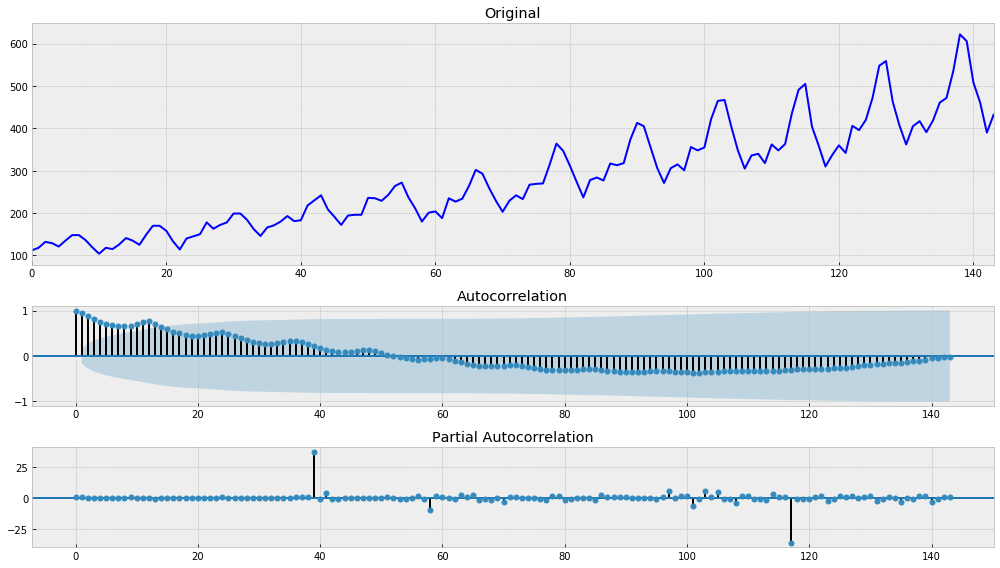

In [ ]:
tsplot(all_series["International airline passengers: monthly totals in thousands"])

# Домашняя работа

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import boxcox
from statsmodels.tsa.stattools import adfuller, acf
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [2]:
def test_stationarity(timeseries):
  print('Results of Dickey-Fuller Test:')
  dftest = adfuller(timeseries, autolag='AIC')
  dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for [key, value] in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
  print(dfoutput)

In [45]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
  test_stationarity(y)
  if not isinstance(y, pd.Series):
    y = pd.Series(y)
  with plt.style.context(style):
    plt.figure(figsize=figsize)
    layout = (4, 1)
    ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
    acf_ax = plt.subplot2grid(layout, (2, 0))
    pacf_ax = plt.subplot2grid(layout, (3, 0))

    y.plot(ax=ts_ax, color='blue', label='Or')
    ts_ax.set_title('Original')

    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
    smt.graphics.plot_pacf(y, lags=None, ax=pacf_ax, alpha=0.05)

    plt.tight_layout()
  return

## International airline passengers

In [61]:
series = pd.read_csv("international-airline-passengers.csv")["International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60"].dropna()

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


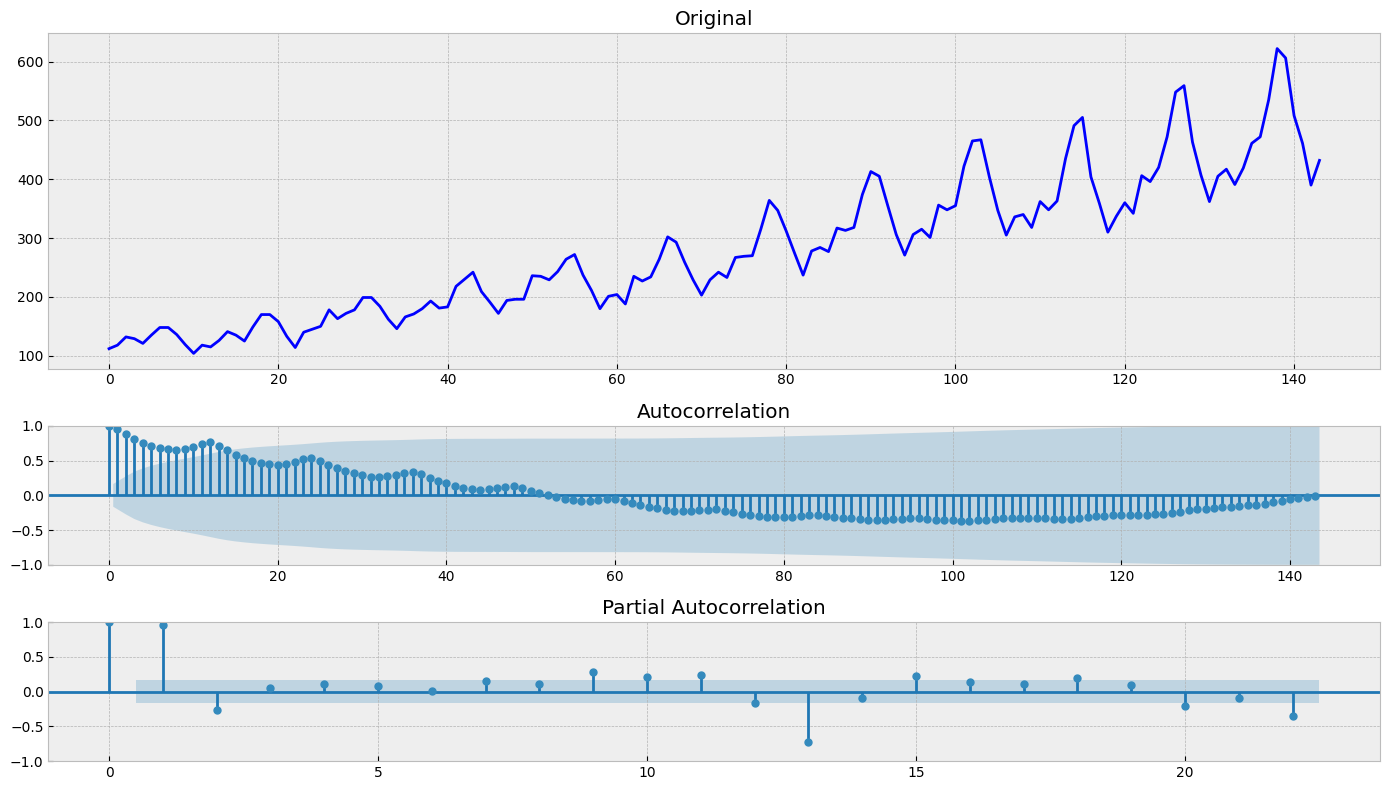

In [62]:
tsplot(series,series.shape[0]-1)

(array([11., 13., 14., 13.,  9., 10., 11.,  7.,  9., 13.,  3., 10.,  6.,
         4.,  4.,  2.,  1.,  2.,  0.,  2.]),
 array([104. , 129.9, 155.8, 181.7, 207.6, 233.5, 259.4, 285.3, 311.2,
        337.1, 363. , 388.9, 414.8, 440.7, 466.6, 492.5, 518.4, 544.3,
        570.2, 596.1, 622. ]),
 <BarContainer object of 20 artists>)

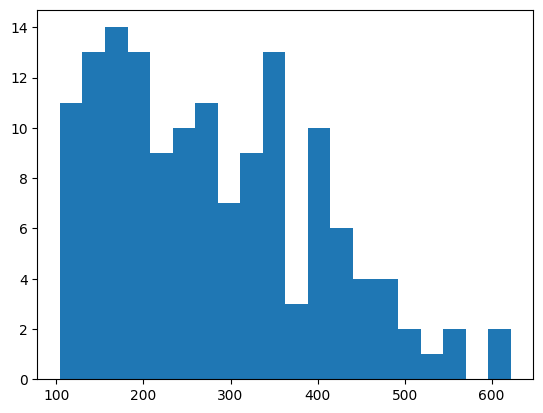

In [63]:
plt.hist(series,bins=20)

Не очень нормальное распределение и со временем повышается размах дисперсии. Применим преобразование Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


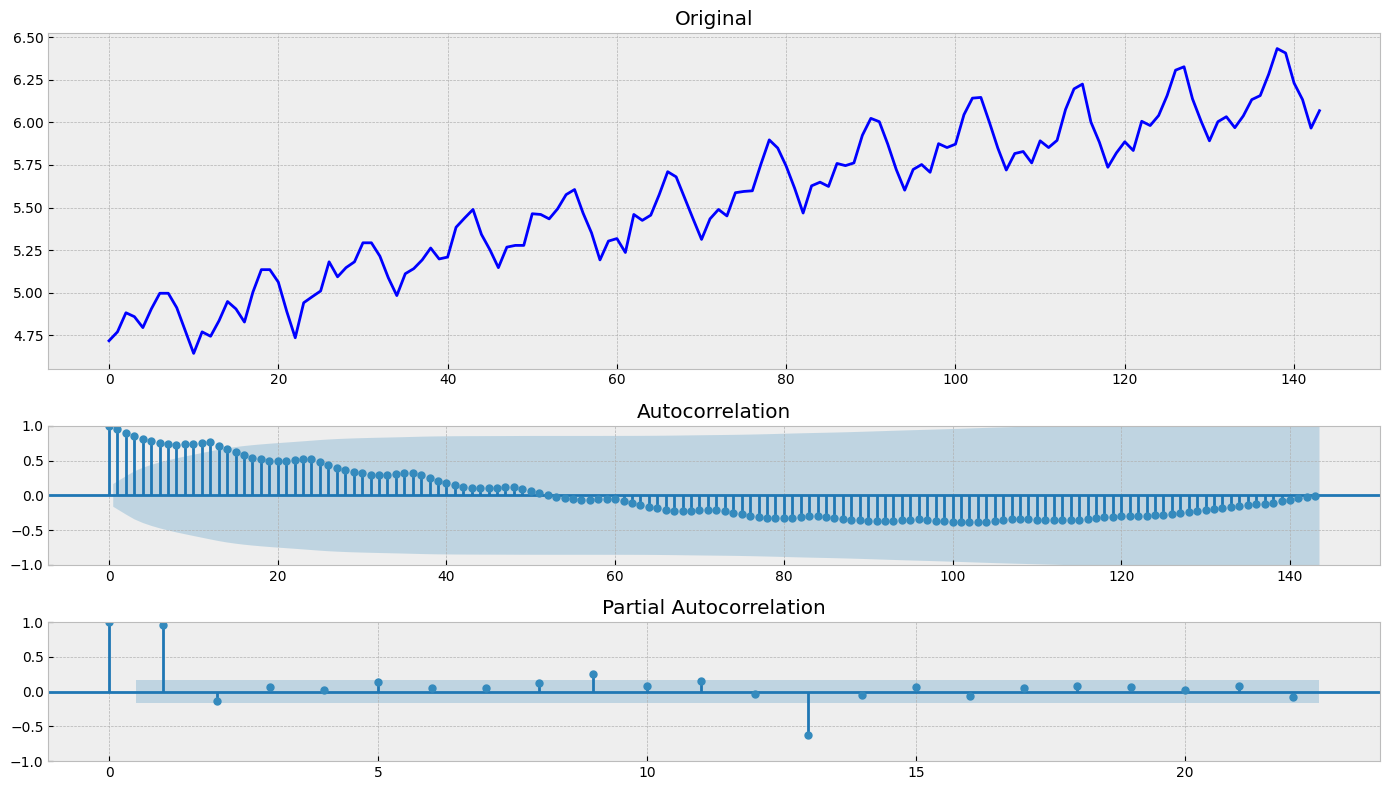

In [64]:
series = boxcox(series, 0)
tsplot(series,series.shape[0]-1)

(array([ 2.,  6.,  8.,  6.,  4.,  7., 11.,  9.,  6., 10., 11.,  4., 11.,
        16.,  5., 12.,  8.,  3.,  3.,  2.]),
 array([4.6443909 , 4.73381836, 4.82324582, 4.91267328, 5.00210074,
        5.0915282 , 5.18095566, 5.27038312, 5.35981058, 5.44923804,
        5.5386655 , 5.62809296, 5.71752042, 5.80694787, 5.89637533,
        5.98580279, 6.07523025, 6.16465771, 6.25408517, 6.34351263,
        6.43294009]),
 <BarContainer object of 20 artists>)

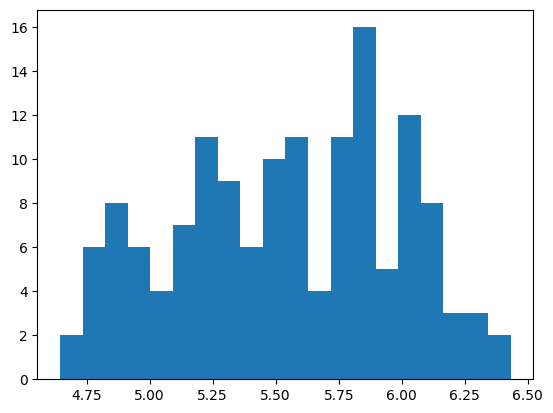

In [65]:
plt.hist(series,bins=20)

Есть тренд. Применим дифференцирование

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


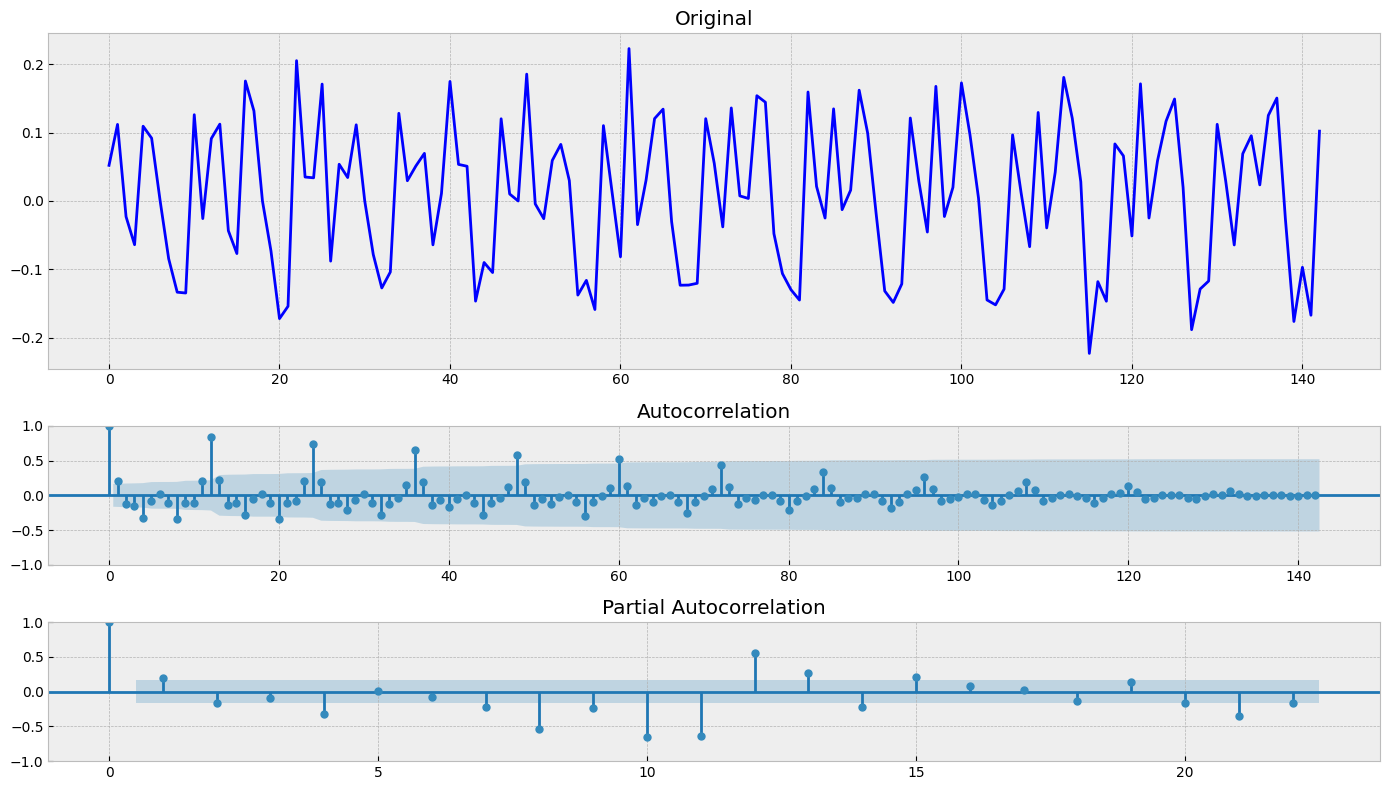

In [66]:
series = series[1:] - series[:-1]
tsplot(series,series.shape[0]-1)

Есть сезонность. 

In [69]:
series2 = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


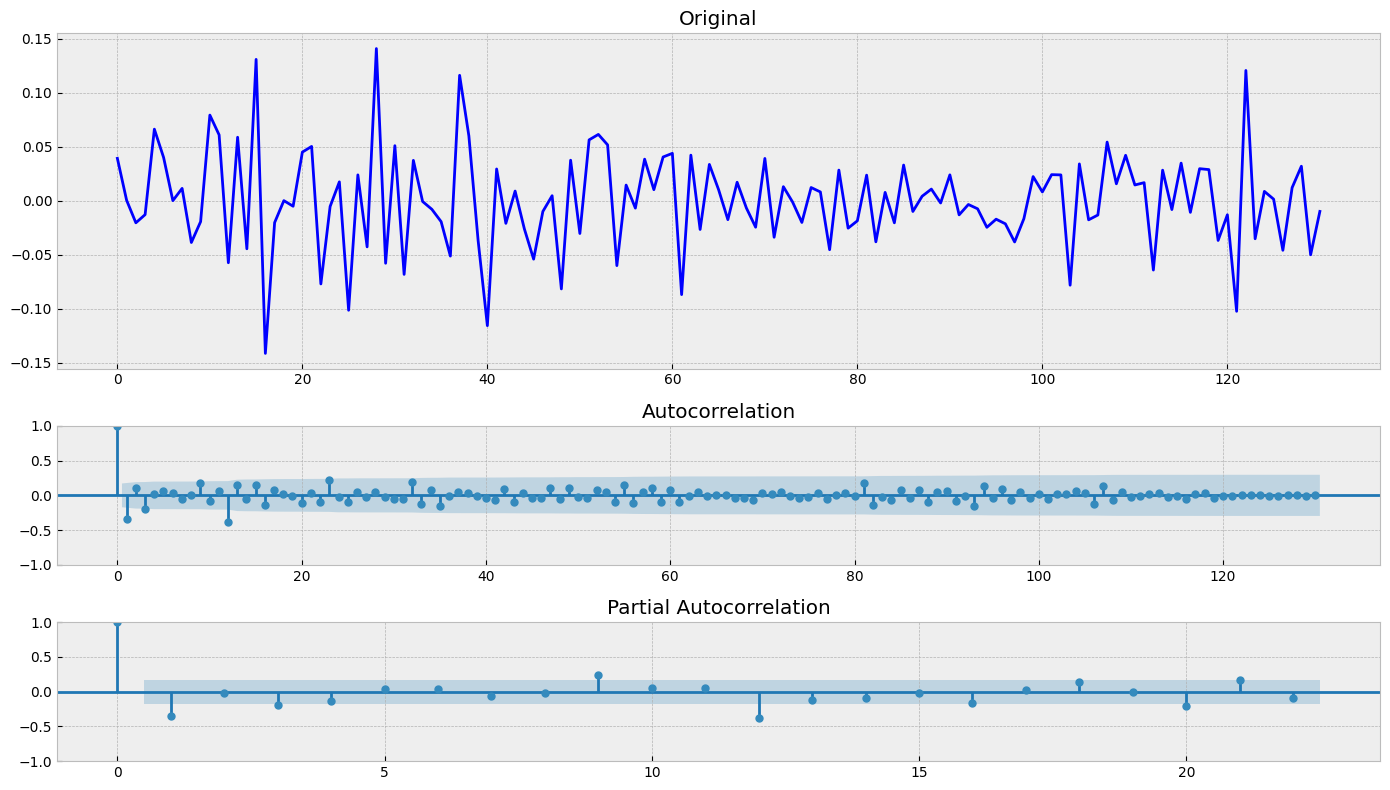

In [70]:
tsplot(series2,series2.shape[0]-1)

Вот теперь p-value меньше 5%, считаем, что ряд теперь стационарный

## Monthly car sales in quebec 1960

Results of Dickey-Fuller Test:
Test Statistic                 -1.223813
p-value                         0.663269
#Lags Used                     12.000000
Number of Observations Used    95.000000
Critical Value (1%)            -3.501137
Critical Value (5%)            -2.892480
Critical Value (10%)           -2.583275
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


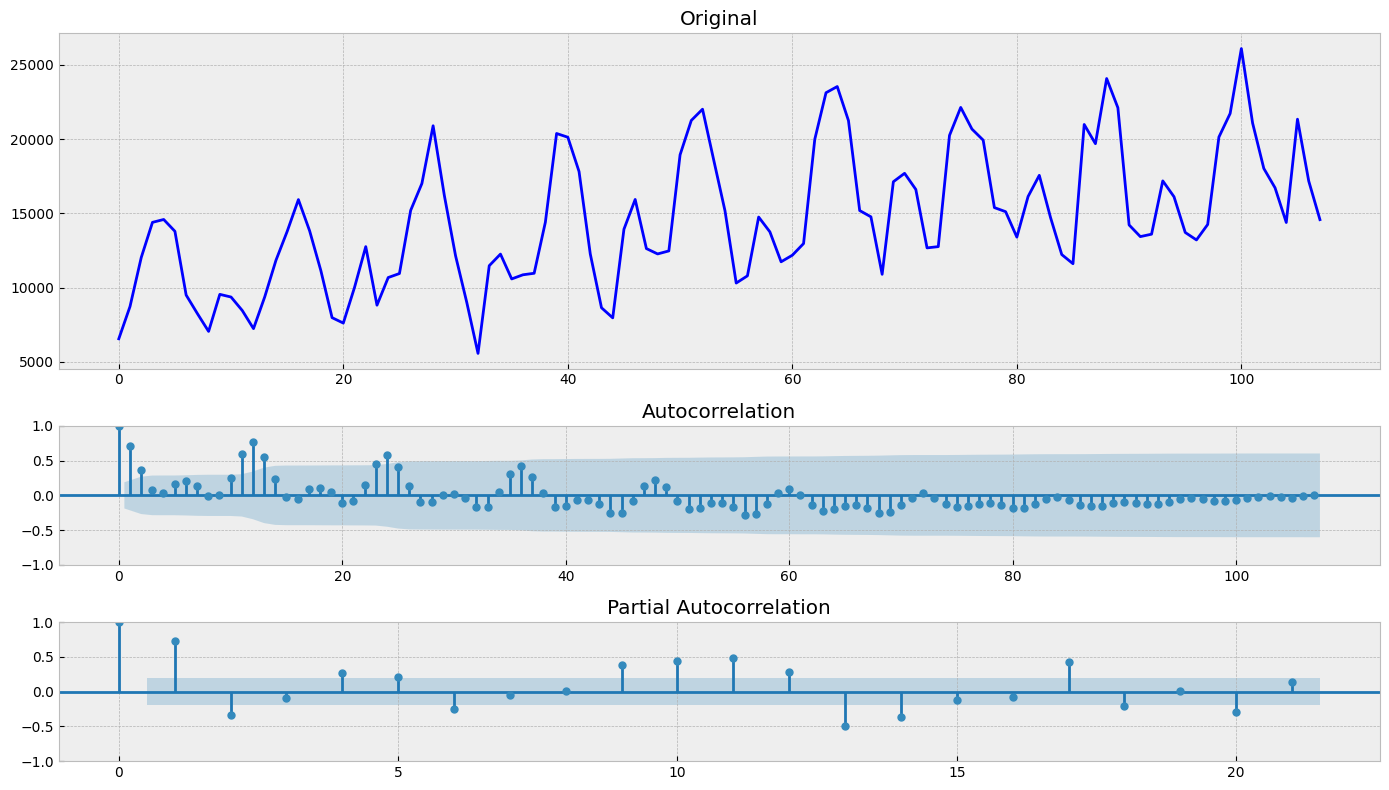

In [79]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")['Count']
tsplot(series,series.shape[0]-1)

(array([ 2.,  3.,  5.,  7.,  4.,  8., 12.,  9., 14.,  5.,  7.,  7.,  2.,
         3.,  7.,  6.,  3.,  2.,  1.,  1.]),
 array([ 5568.  ,  6594.55,  7621.1 ,  8647.65,  9674.2 , 10700.75,
        11727.3 , 12753.85, 13780.4 , 14806.95, 15833.5 , 16860.05,
        17886.6 , 18913.15, 19939.7 , 20966.25, 21992.8 , 23019.35,
        24045.9 , 25072.45, 26099.  ]),
 <BarContainer object of 20 artists>)

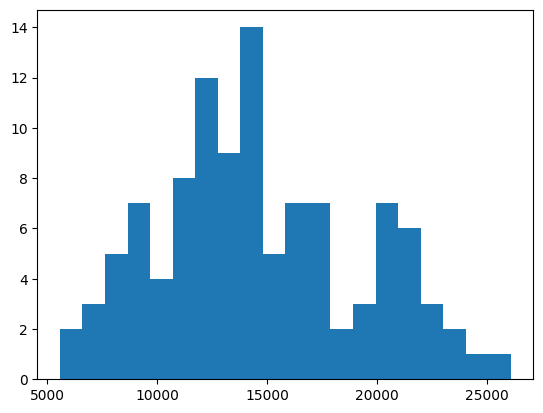

In [80]:
plt.hist(series,bins=20)

Нет такого сильного размаха дисперсии, но есть тренд и сезонность. Тренд устраняем дифференцированием

Results of Dickey-Fuller Test:
Test Statistic                -6.199799e+00
p-value                        5.844753e-08
#Lags Used                     1.100000e+01
Number of Observations Used    9.500000e+01
Critical Value (1%)           -3.501137e+00
Critical Value (5%)           -2.892480e+00
Critical Value (10%)          -2.583275e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


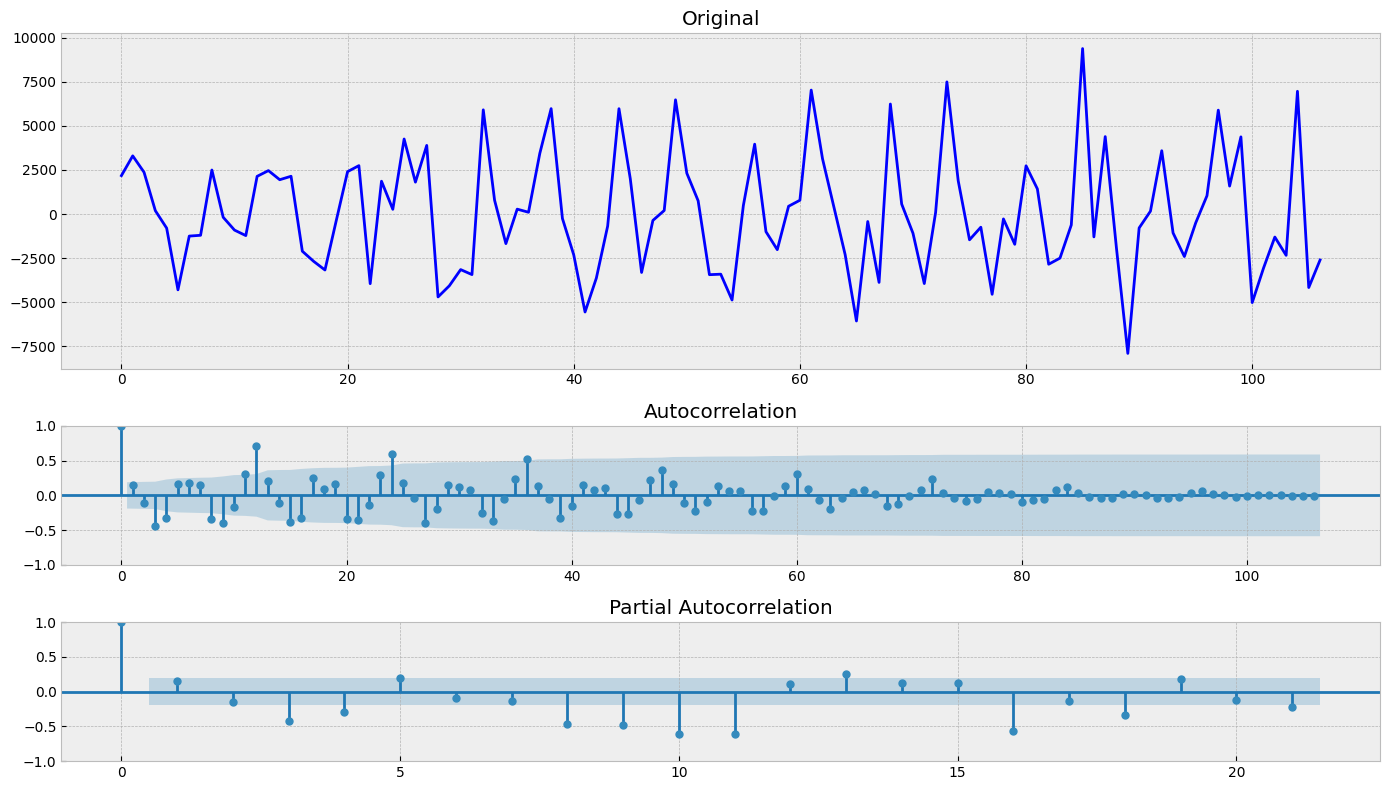

In [87]:
series = series[1:].to_numpy() - series[:-1].to_numpy()
tsplot(series,series.shape[0]-1)

p-value намного меньше 5%, но осталась сезонность. Устраним её

Results of Dickey-Fuller Test:
Test Statistic                 -3.345097
p-value                         0.012979
#Lags Used                     11.000000
Number of Observations Used    83.000000
Critical Value (1%)            -3.511712
Critical Value (5%)            -2.897048
Critical Value (10%)           -2.585713
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


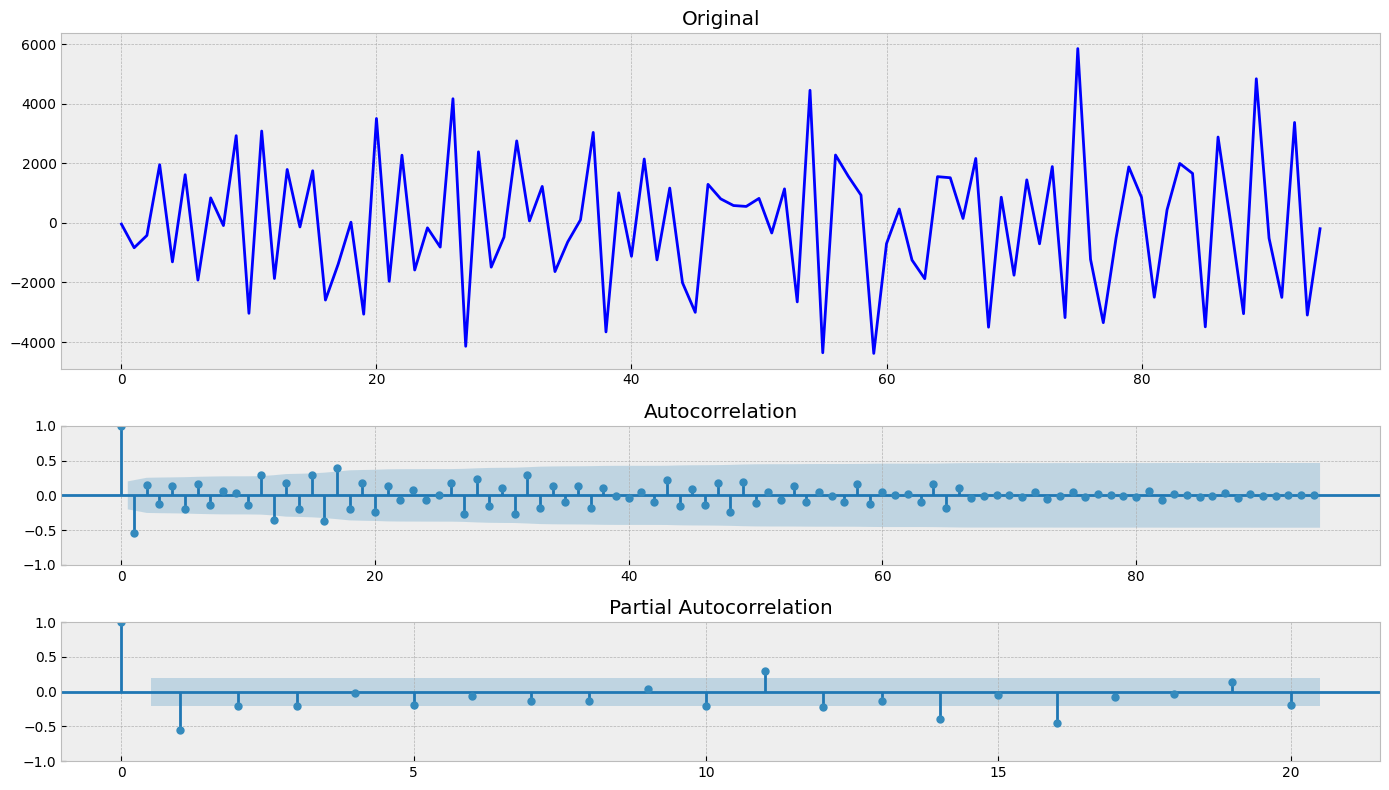

In [88]:
series2 = series[12:] - series[:-12]
tsplot(series2,series2.shape[0]-1)

p-value стало больше, но сезонность устранена. Ряд по-прежнему стационарный

## Monthly sales of company X

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


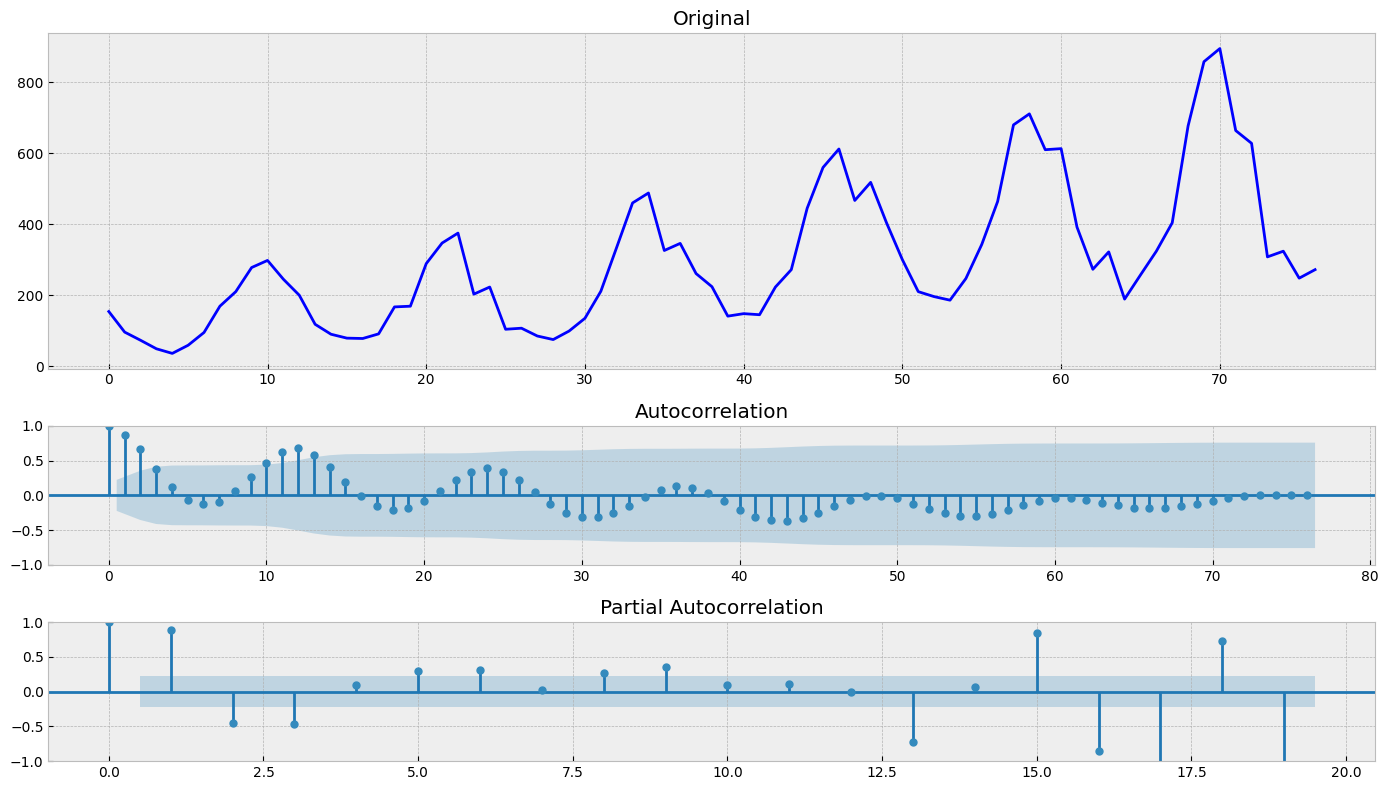

In [104]:
series = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")['Count']
tsplot(series,series.shape[0]-1)

(array([ 6., 10.,  5.,  8.,  9.,  7.,  8.,  4.,  3.,  3.,  2.,  1.,  1.,
         4.,  3.,  1.,  0.,  0.,  0.,  2.]),
 array([ 36.  ,  78.95, 121.9 , 164.85, 207.8 , 250.75, 293.7 , 336.65,
        379.6 , 422.55, 465.5 , 508.45, 551.4 , 594.35, 637.3 , 680.25,
        723.2 , 766.15, 809.1 , 852.05, 895.  ]),
 <BarContainer object of 20 artists>)

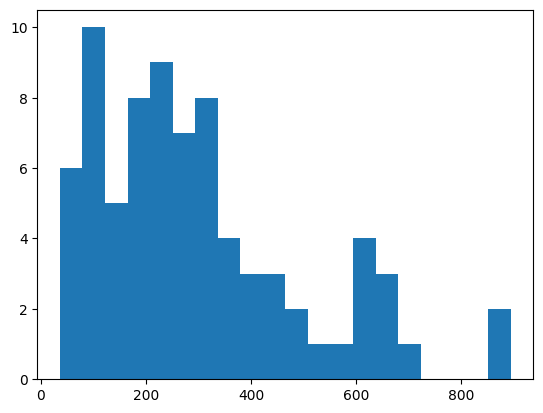

In [105]:
plt.hist(series,bins=20)

Устраняем размах дисперсии преобразованием Бокса-Кокса

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


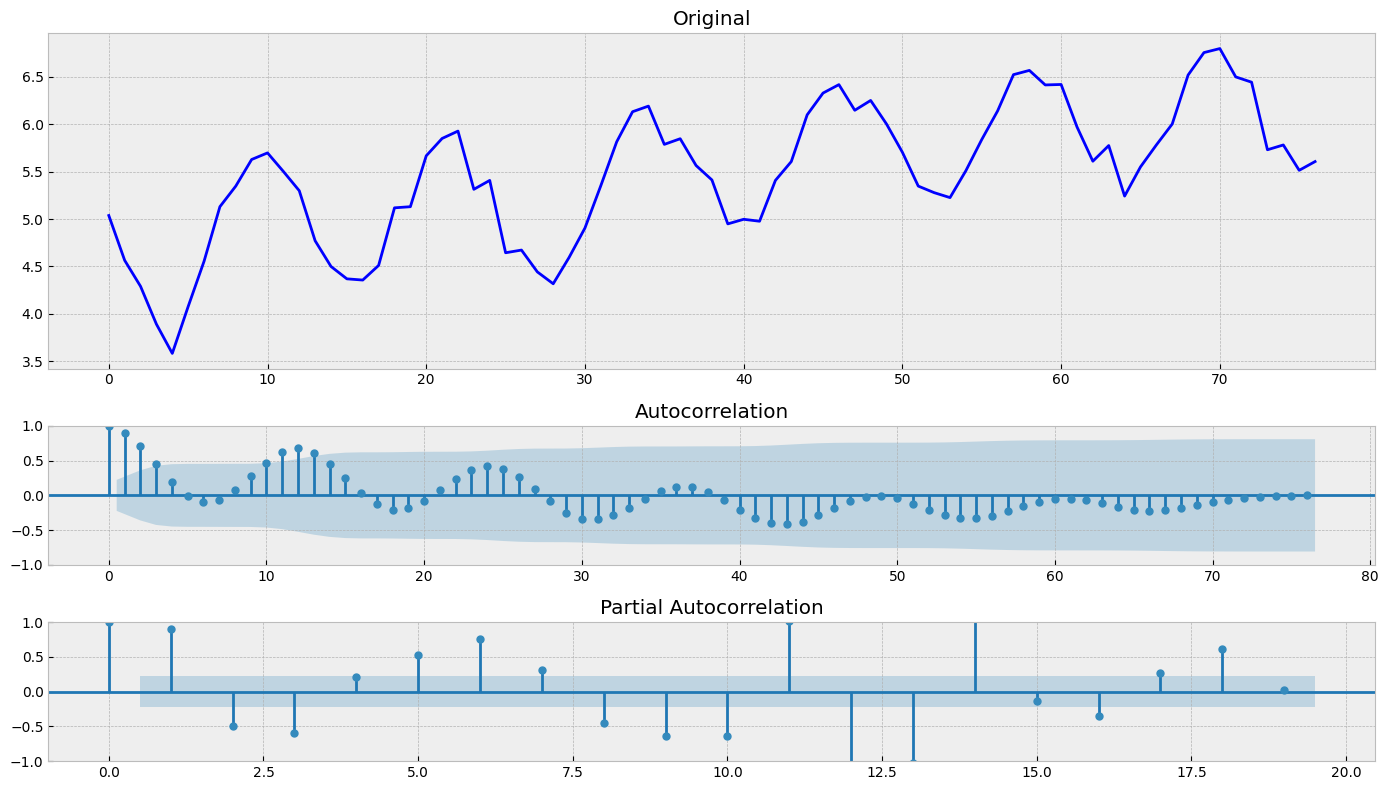

In [106]:
series = boxcox(series, 0)
tsplot(series,series.shape[0]-1)

(array([1., 1., 0., 1., 4., 3., 5., 1., 4., 4., 7., 6., 8., 8., 5., 6., 2.,
        5., 4., 2.]),
 array([3.58351894, 3.74418418, 3.90484942, 4.06551466, 4.22617989,
        4.38684513, 4.54751037, 4.70817561, 4.86884085, 5.02950609,
        5.19017133, 5.35083657, 5.51150181, 5.67216705, 5.83283228,
        5.99349752, 6.15416276, 6.314828  , 6.47549324, 6.63615848,
        6.79682372]),
 <BarContainer object of 20 artists>)

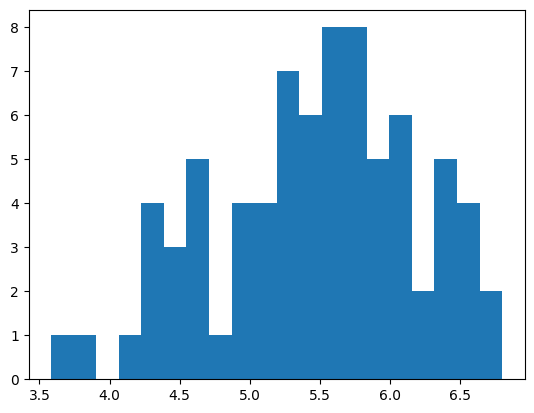

In [107]:
plt.hist(series,bins=20)

Устраняем тренд дифференцированием

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


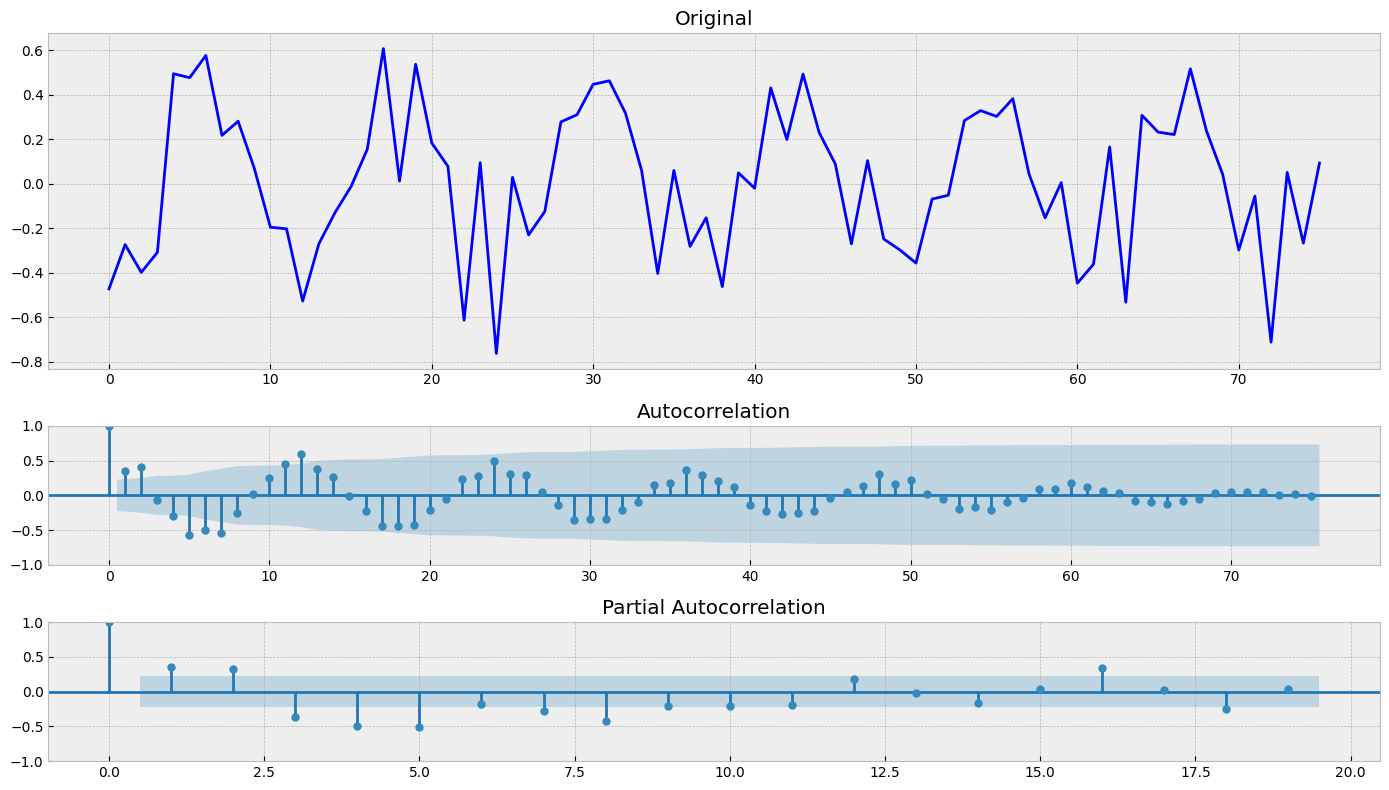

In [108]:
series = series[1:] - series[:-1]
tsplot(series,series.shape[0]-1)

Уже ряд стационарный, но надо устранить сезонность

Results of Dickey-Fuller Test:
Test Statistic                 -2.316045
p-value                         0.166845
#Lags Used                     10.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


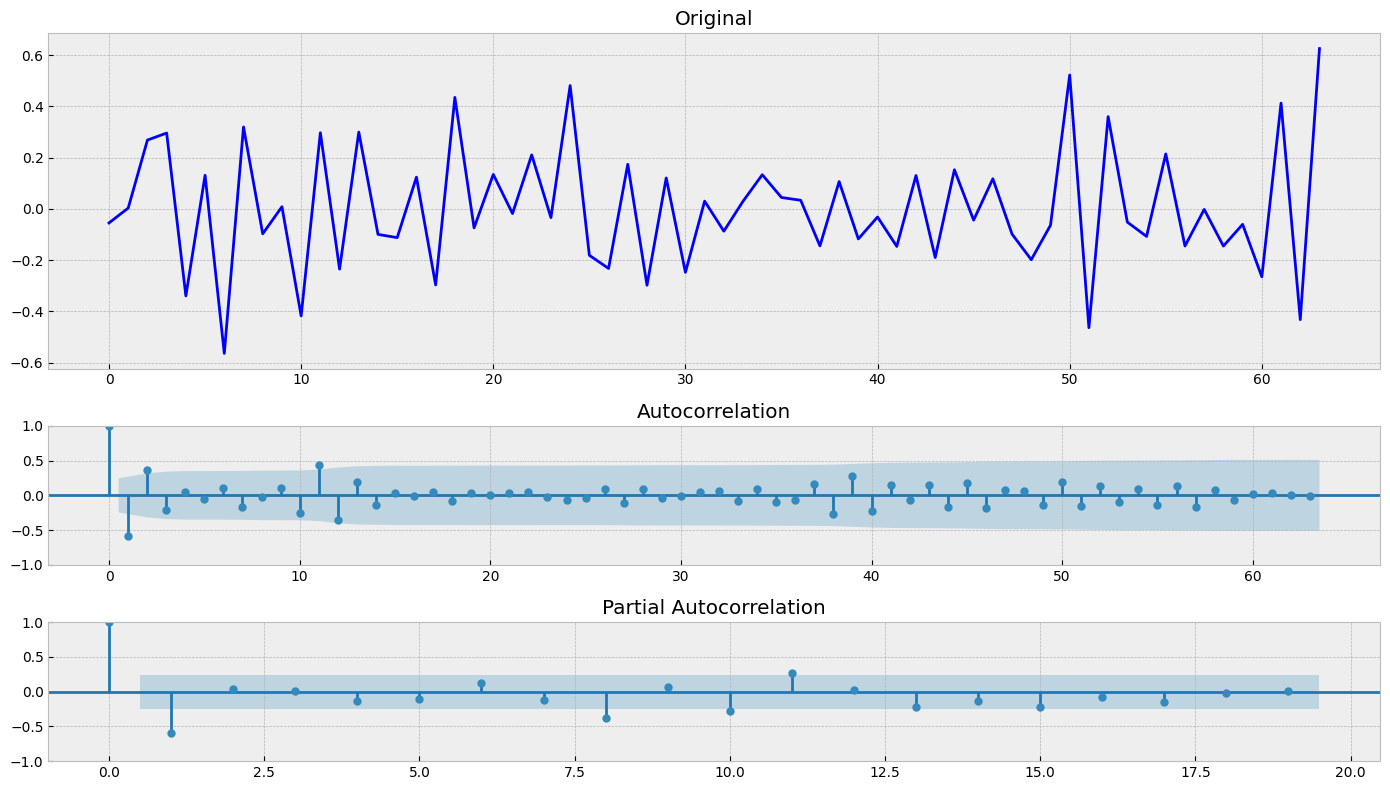

In [109]:
series2 = series[12:] - series[:-12]
tsplot(series2,series2.shape[0]-1)

(array([ 1.,  1.,  2.,  1.,  2.,  4.,  3., 10.,  9.,  6.,  2.,  8.,  2.,
         3.,  4.,  1.,  2.,  1.,  1.,  1.]),
 array([-0.56411692, -0.50465218, -0.44518744, -0.38572271, -0.32625797,
        -0.26679323, -0.20732849, -0.14786375, -0.08839901, -0.02893427,
         0.03053046,  0.0899952 ,  0.14945994,  0.20892468,  0.26838942,
         0.32785416,  0.3873189 ,  0.44678363,  0.50624837,  0.56571311,
         0.62517785]),
 <BarContainer object of 20 artists>)

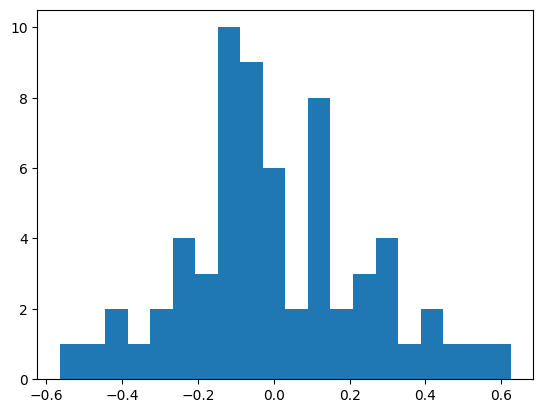

In [110]:
plt.hist(series2,bins=20)

Убралась сезонность, а вместе с ней и стационарность.

## Mean monthly air temperature

In [131]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
  test_stationarity(y)
  if not isinstance(y, pd.Series):
    y = pd.Series(y)
  with plt.style.context(style):
    plt.figure(figsize=figsize)
    layout = (4, 1)
    ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
    acf_ax = plt.subplot2grid(layout, (2, 0))
    pacf_ax = plt.subplot2grid(layout, (3, 0))
    
    z = np.polyfit (np.arange(y.shape[0]), y, 1)
    p = np.poly1d (z)
    y.plot(ax=ts_ax, color='blue', label='Or')
    pd.Series(p(np.arange(y.shape[0]))).plot(ax=ts_ax, color='red', label='Trend',linewidth=1)
    ts_ax.set_title('Original')

    smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
    smt.graphics.plot_pacf(y, lags=None, ax=pacf_ax, alpha=0.05)

    plt.tight_layout()
  return

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


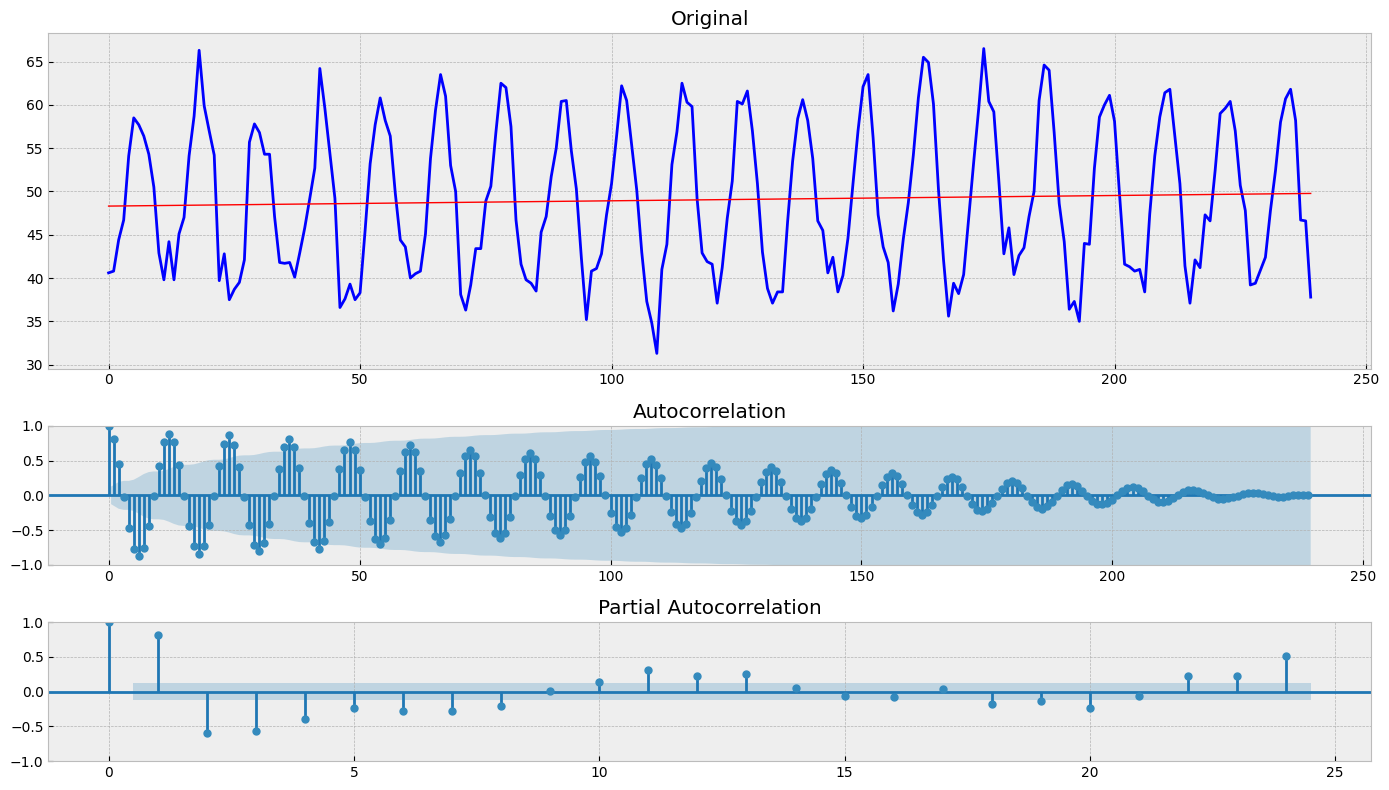

In [132]:
series = pd.read_csv("mean-monthly-air-temperature-deg.csv")['Deg']
tsplot(series,series.shape[0]-1)

(array([ 1.,  1.,  6., 13., 20., 26., 21., 12., 17.,  9., 12., 10., 12.,
        10., 14., 16., 22.,  9.,  5.,  4.]),
 array([31.3 , 33.06, 34.82, 36.58, 38.34, 40.1 , 41.86, 43.62, 45.38,
        47.14, 48.9 , 50.66, 52.42, 54.18, 55.94, 57.7 , 59.46, 61.22,
        62.98, 64.74, 66.5 ]),
 <BarContainer object of 20 artists>)

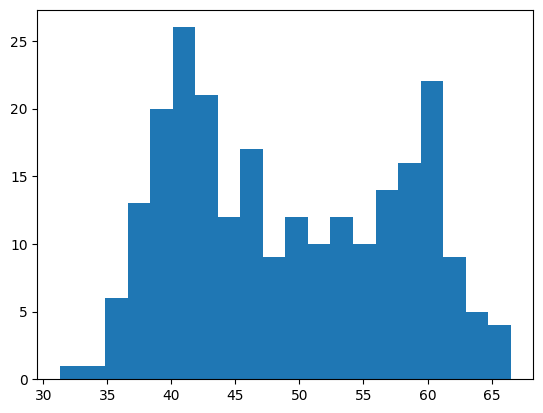

In [118]:
plt.hist(series,bins=20)

Уже как будто бы стационарный ряд, но есть сезонность и ненормальность распределения.

Пренебрежём трендом, т.к. он незначительный, а устраним ненормальность

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


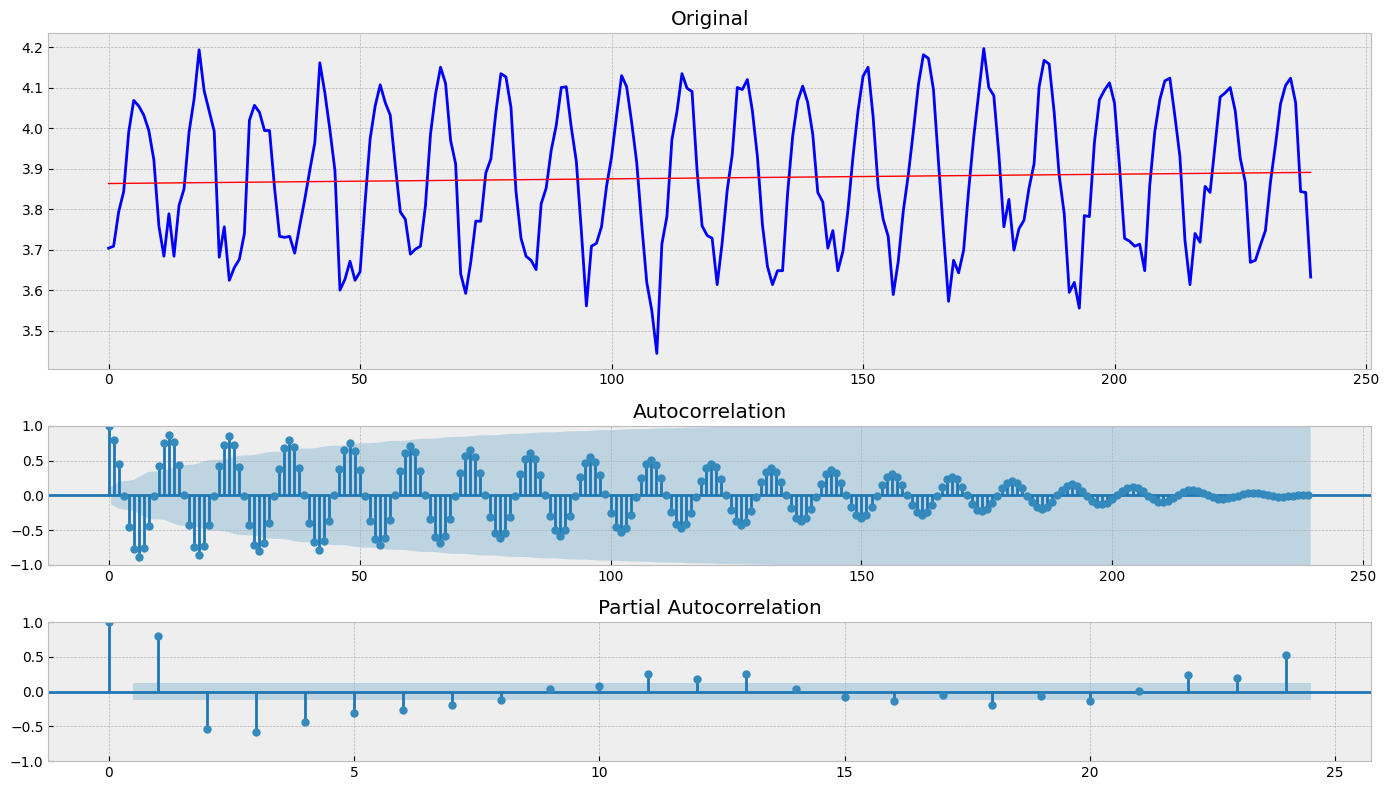

In [133]:
series = boxcox(series, 0)
tsplot(series,series.shape[0]-1)

(array([ 1.,  0.,  2.,  4., 10., 13., 18., 24., 18., 12., 18.,  6., 17.,
         8., 17., 15., 16., 25., 10.,  6.]),
 array([3.4436181 , 3.48129729, 3.51897648, 3.55665568, 3.59433487,
        3.63201406, 3.66969325, 3.70737245, 3.74505164, 3.78273083,
        3.82041002, 3.85808922, 3.89576841, 3.9334476 , 3.97112679,
        4.00880599, 4.04648518, 4.08416437, 4.12184356, 4.15952276,
        4.19720195]),
 <BarContainer object of 20 artists>)

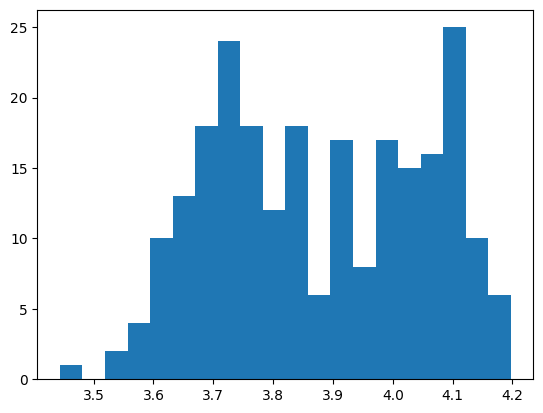

In [134]:
plt.hist(series,bins=20)

Устраняем сезонность

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


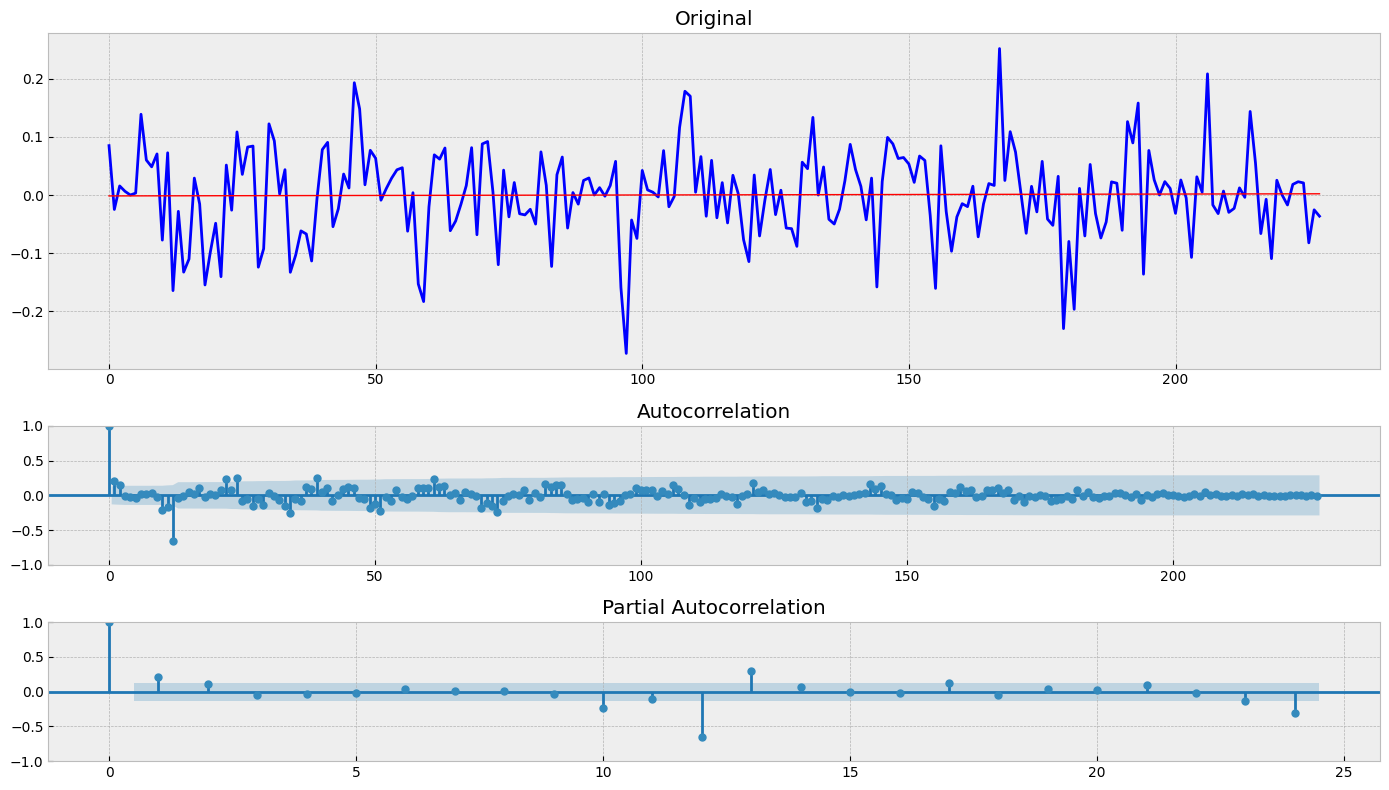

In [136]:
series2 = series[12:] - series[:-12]
tsplot(series2,series2.shape[0]-1)

В принципе, ряд и так стационарный, но на коррелограмме можно увидеть подобие цикла

In [159]:
r = 20
x = np.arange(200)
y = acf(series2,adjusted=False,nlags=199)
z = list(zip(x,y))
for k,v in z[r:-r]:
  if v == max([v for k,v in z[k-r:k+r+1]]) and v>0:
    print(k,v)

24 0.2529278116594653
61 0.22879871416622607
82 0.15879493100215789
121 0.1760737402848064
143 0.16016697598578444


Есть некий пятилетний цикл

## Monthly Boston armed robberies

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


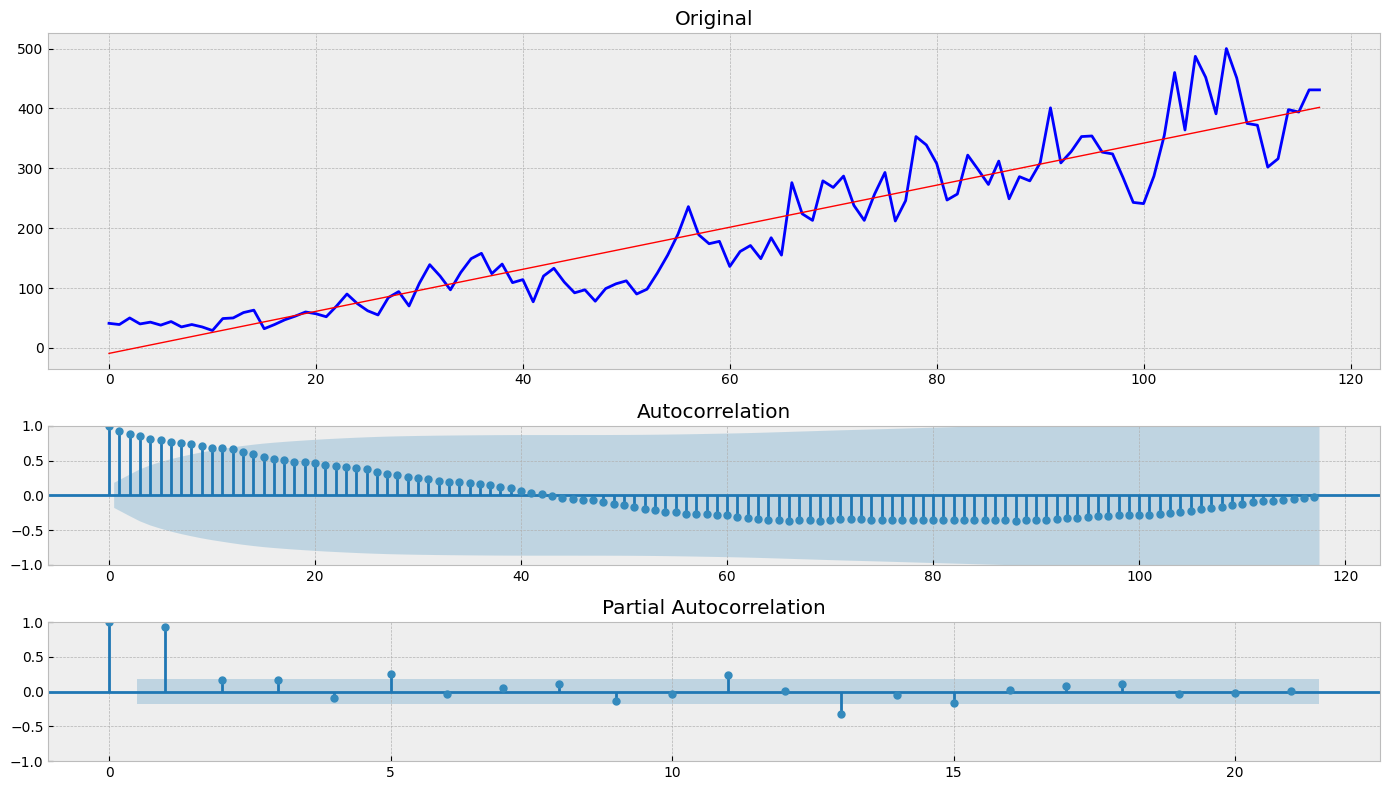

In [163]:
series = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']
tsplot(series,series.shape[0]-1)

(array([17., 10., 11.,  8.,  7.,  6.,  6.,  3.,  3.,  7.,  9.,  6.,  6.,
         5.,  3.,  4.,  0.,  4.,  1.,  2.]),
 array([ 29.  ,  52.55,  76.1 ,  99.65, 123.2 , 146.75, 170.3 , 193.85,
        217.4 , 240.95, 264.5 , 288.05, 311.6 , 335.15, 358.7 , 382.25,
        405.8 , 429.35, 452.9 , 476.45, 500.  ]),
 <BarContainer object of 20 artists>)

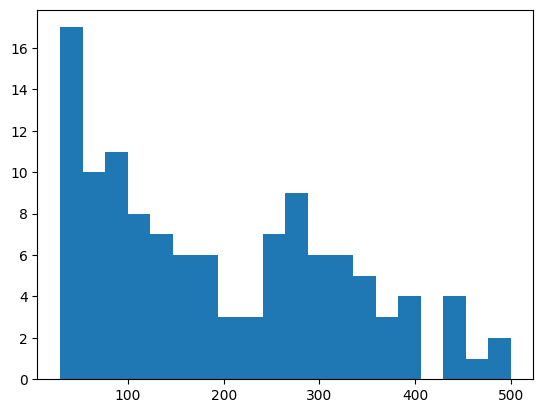

In [164]:
plt.hist(series,bins=20)

Есть тренд и повышение дисперсии

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


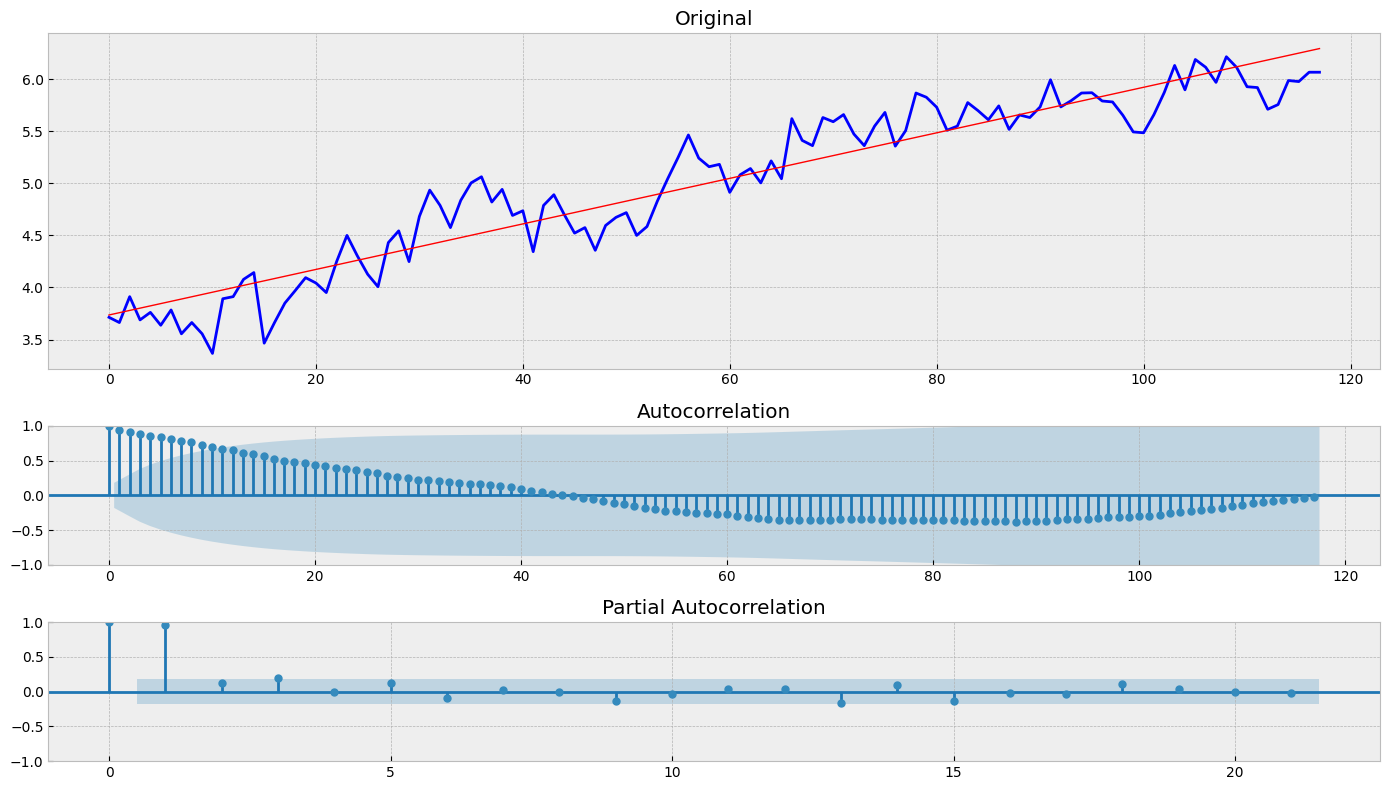

In [165]:
series = boxcox(series, 0)
tsplot(series,series.shape[0]-1)

(array([ 2.,  3.,  7.,  4.,  5.,  3.,  5.,  3.,  6.,  8.,  5.,  7.,  5.,
         3.,  7., 10., 14., 10.,  6.,  5.]),
 array([3.36729583, 3.50966144, 3.65202706, 3.79439267, 3.93675828,
        4.0791239 , 4.22148951, 4.36385512, 4.50622074, 4.64858635,
        4.79095196, 4.93331758, 5.07568319, 5.2180488 , 5.36041442,
        5.50278003, 5.64514564, 5.78751126, 5.92987687, 6.07224249,
        6.2146081 ]),
 <BarContainer object of 20 artists>)

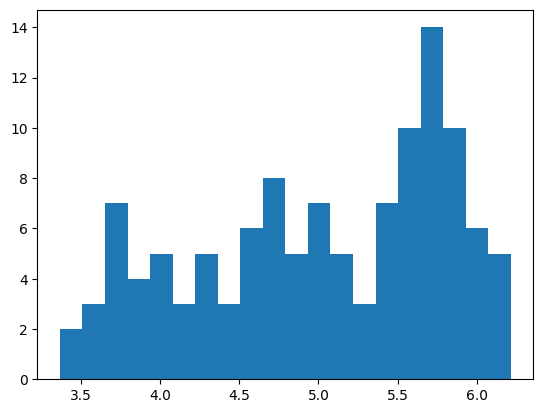

In [166]:
plt.hist(series,bins=20)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


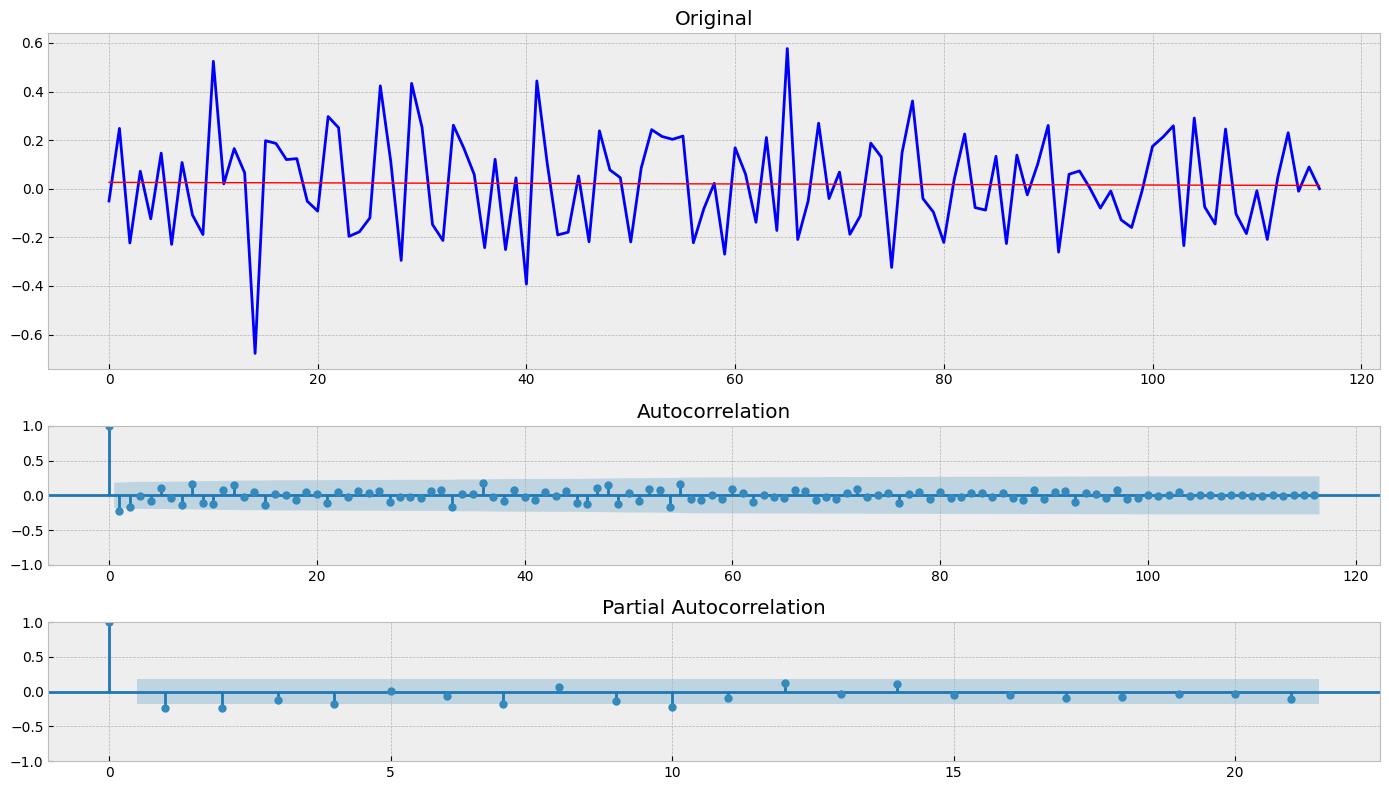

In [167]:
series = series[1:] - series[:-1]
tsplot(series,series.shape[0]-1)

Теперь ряд стационарный

## Weekly closings of the Dow Jones

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


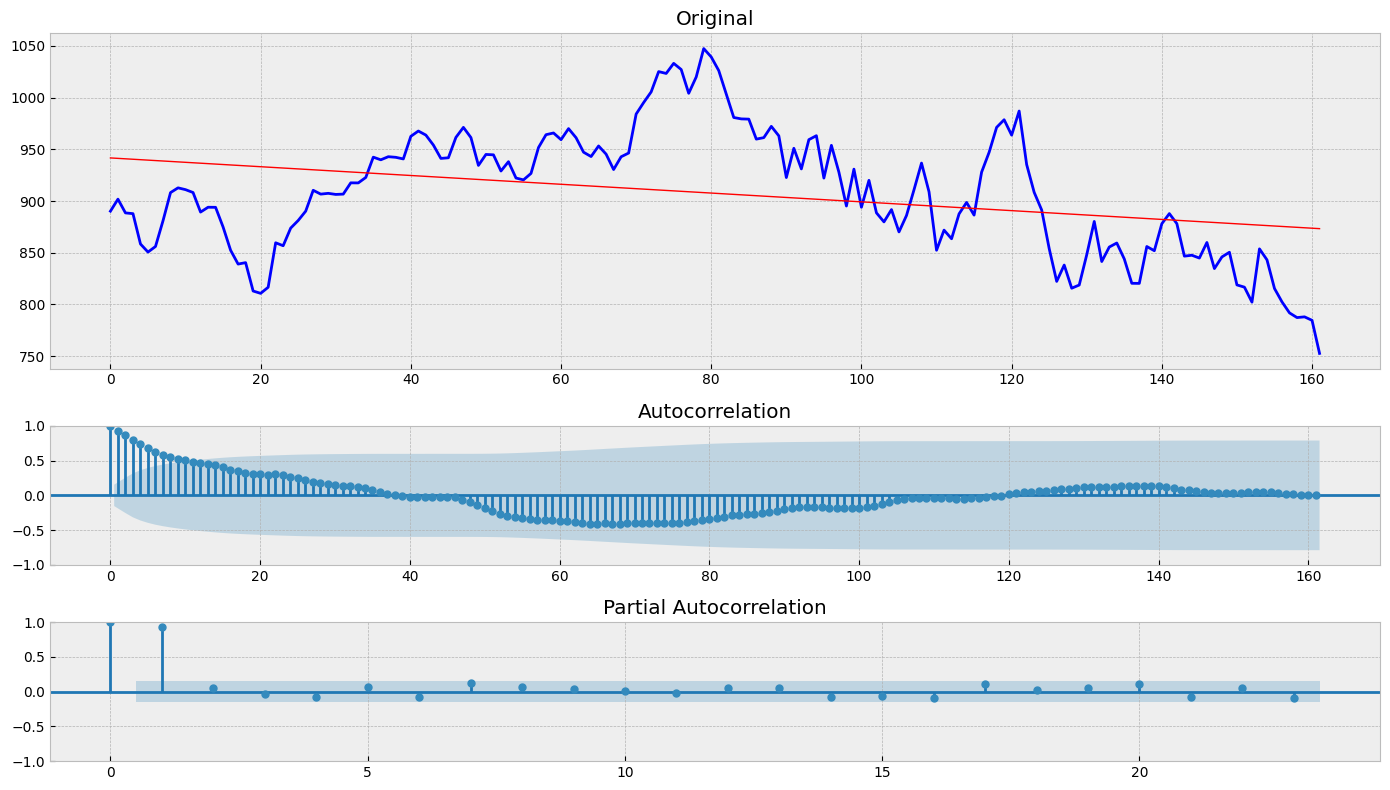

In [170]:
series = pd.read_csv("weekly-closings-of-the-dowjones-.csv")['Close']
tsplot(series,series.shape[0]-1)

(array([ 1.,  0.,  4.,  3., 10.,  4., 16.,  9.,  9., 17., 13., 12., 16.,
        11., 19.,  6.,  1.,  3.,  5.,  3.]),
 array([ 752.58  ,  767.3255,  782.071 ,  796.8165,  811.562 ,  826.3075,
         841.053 ,  855.7985,  870.544 ,  885.2895,  900.035 ,  914.7805,
         929.526 ,  944.2715,  959.017 ,  973.7625,  988.508 , 1003.2535,
        1017.999 , 1032.7445, 1047.49  ]),
 <BarContainer object of 20 artists>)

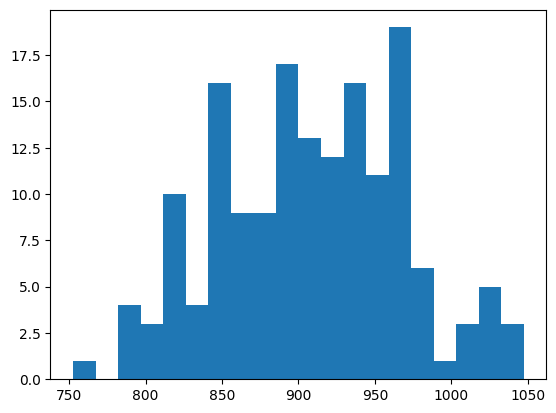

In [171]:
plt.hist(series,bins=20)

Посмотрим, что будет, если улучшить дисперсию

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


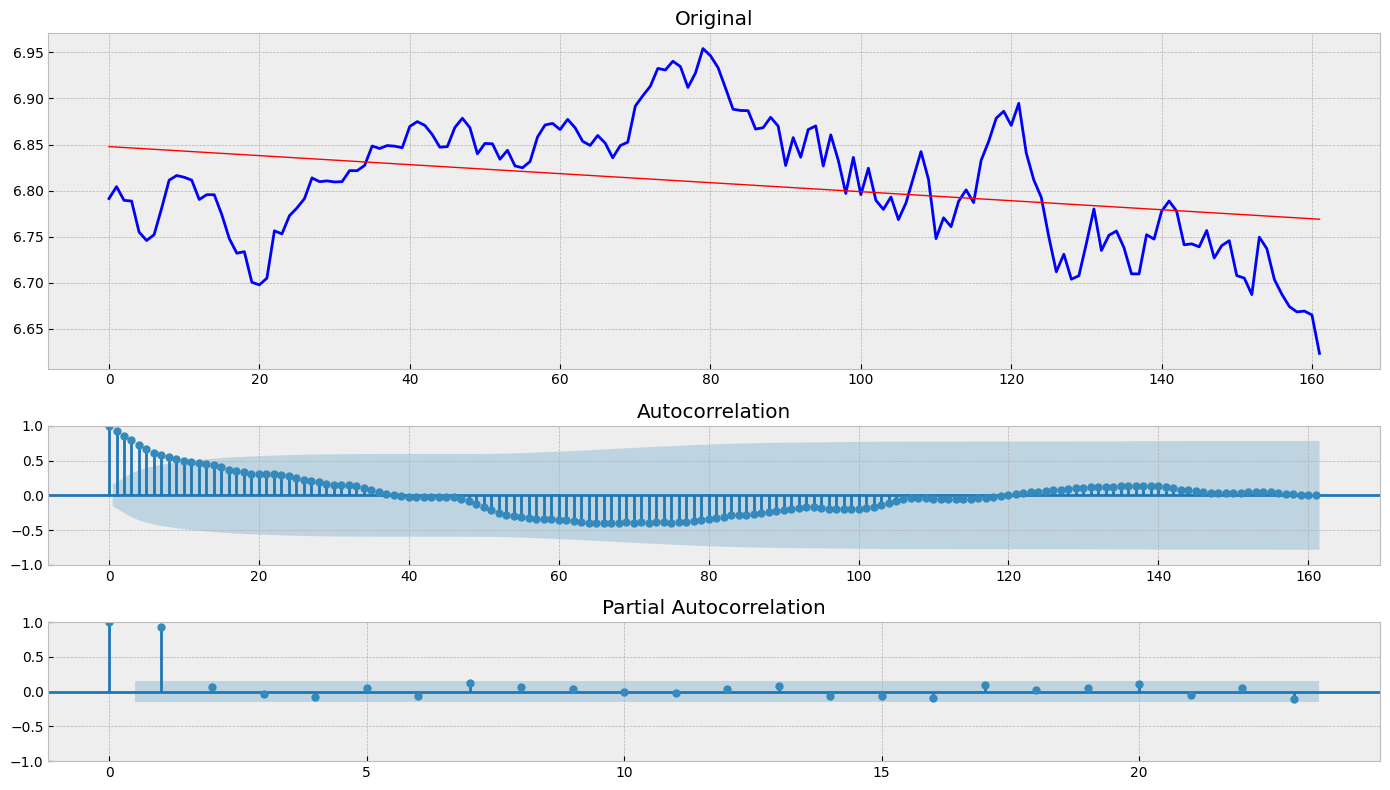

In [172]:
series = boxcox(series, 0)
tsplot(series,series.shape[0]-1)

(array([ 1.,  0.,  3.,  3.,  6.,  5.,  8., 16.,  6., 13., 13., 14., 13.,
        19., 18.,  9.,  4.,  3.,  5.,  3.]),
 array([6.6235073 , 6.64003954, 6.65657178, 6.67310402, 6.68963626,
        6.7061685 , 6.72270074, 6.73923298, 6.75576522, 6.77229746,
        6.7888297 , 6.80536194, 6.82189418, 6.83842642, 6.85495866,
        6.8714909 , 6.88802314, 6.90455538, 6.92108763, 6.93761987,
        6.95415211]),
 <BarContainer object of 20 artists>)

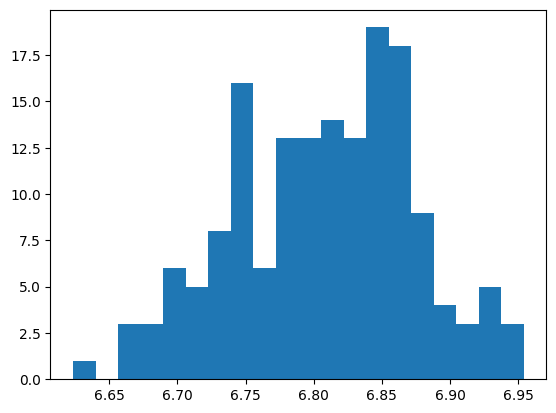

In [173]:
plt.hist(series,bins=20)

Ничего существенного не произошло. Тренда тоже особо никакого нет, но попробуем продифференцировать

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


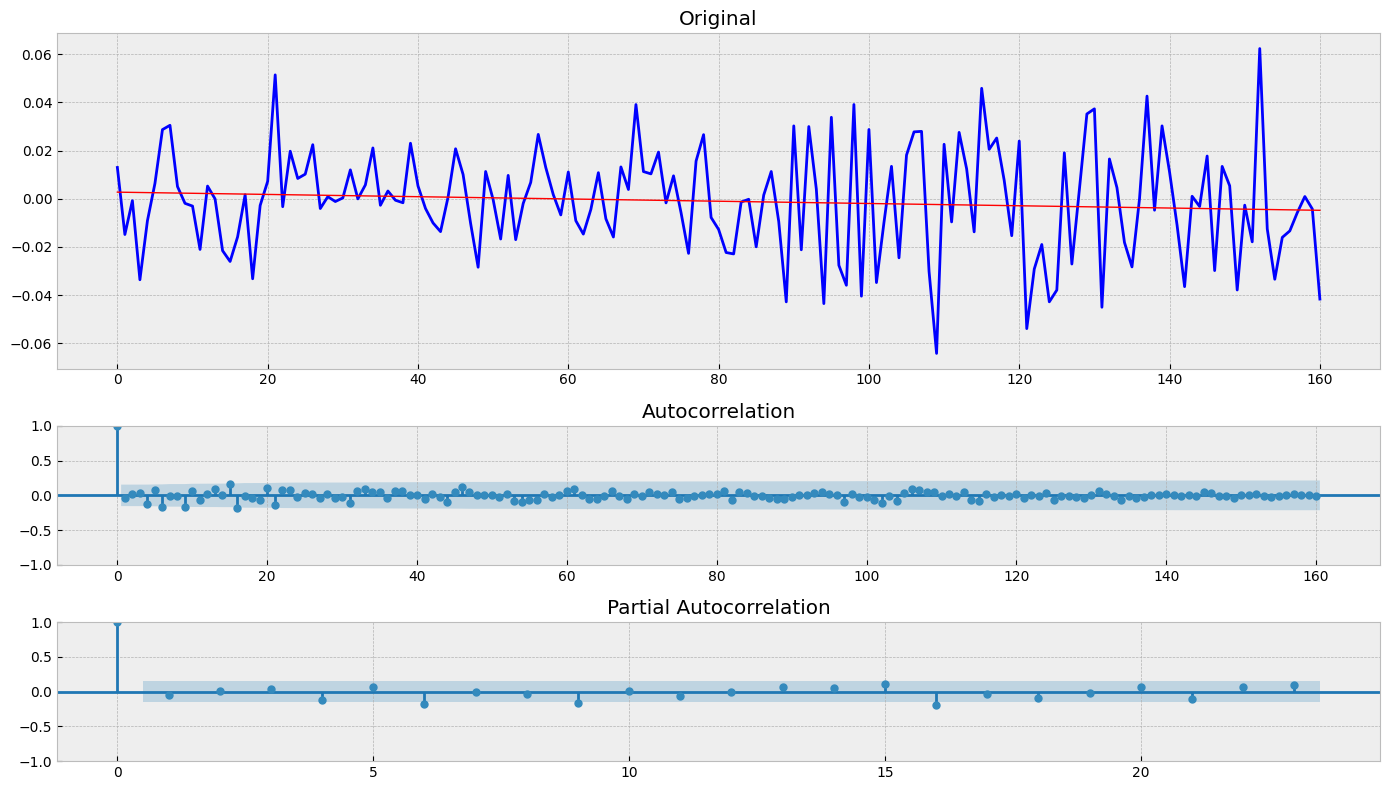

In [174]:
series = series[1:] - series[:-1]
tsplot(series,series.shape[0]-1)

Теперь ряд стационарный